In [1]:
import pandas as pd


In [2]:
churnData = pd.read_csv(r"C:\Users\usuario\Desktop\Bootcamp-Ironhack\Customer-Churn.csv")

In [3]:
import numpy as np

In [4]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [5]:
unique_contract_types = churnData['Contract'].unique()

In [6]:
# Crear un diccionario de mapeo
contract_mapping = {
    'Month-to-month': 1,
    'One year': 12,
    'Two year': 24
}

In [7]:
# Aplicar el mapeo a la columna 'Contract'
churnData['Contract'] = churnData['Contract'].replace(contract_mapping)

C:\Users\usuario\AppData\Local\Temp\ipykernel_25396\1648908267.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churnData['Contract'] = churnData['Contract'].replace(contract_mapping)


In [10]:
unique_contract_types

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [9]:
# Verificar los resultados
print(churnData[['Contract']].head())

   Contract
0         1
1        12
2         1
3        12
4         1


In [11]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,1,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,12,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,1,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,12,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,1,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,12,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,12,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,1,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,1,74.40,306.6,Yes


In [12]:
# Convertir 'TotalCharges' a numérico y manejar los valores faltantes
churnData['TotalCharges']  = pd.to_numeric(churnData['TotalCharges'], errors='coerce')
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(np.mean(churnData['TotalCharges']))


In [13]:
X = churnData[["tenure","Contract","MonthlyCharges","TotalCharges"]]

In [14]:
y = churnData["Churn"]

In [15]:
from sklearn.pipeline import Pipeline

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [19]:
# Definir el pipeline para regresión logística
pipeline_lr = Pipeline([
    ('log_reg', LogisticRegression())  # Modelo de regresión logística
])

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Aplicar SMOTE para balancear las clases
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_scaled, y)

In [25]:
# Realizar la validación cruzada
scores_lr = cross_val_score(pipeline_lr, X_sm, y_sm, cv=5, scoring='accuracy')
print(f'Regresión Logística - Accuracy: {scores_lr.mean():.4f}')

Regresión Logística - Accuracy: 0.7544


In [26]:
# Definir el pipeline para el árbol de decisión
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),  # Escalado de características
    ('decision_tree', DecisionTreeClassifier())  # Clasificador de árbol de decisión
])

# Realizar la validación cruzada
scores_dt = cross_val_score(pipeline_dt, X_sm, y_sm, cv=5, scoring='accuracy')
print(f'Árbol de Decisión - Accuracy: {scores_dt.mean():.4f}')

Árbol de Decisión - Accuracy: 0.7752


In [27]:
from sklearn.datasets import load_iris

In [28]:
iris=load_iris()

In [29]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [30]:
X_sm

array([[-1.27744458, -0.82044365, -1.16032292, -0.99497138],
       [ 0.06632742,  0.33129642, -0.25962894, -0.17387565],
       [-1.23672422, -0.82044365, -0.36266036, -0.96039939],
       ...,
       [-0.95066796, -0.82044365, -0.64337994, -0.82341542],
       [-1.27744458, -0.82044365,  0.18700144, -0.97707246],
       [-1.27744458, -0.82044365,  0.35030576, -0.974903  ]])

In [34]:
feature_names = ["tenure","Contract","MonthlyCharges","TotalCharges"], class_names = ["Churn"]

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1541266286.py, line 1)

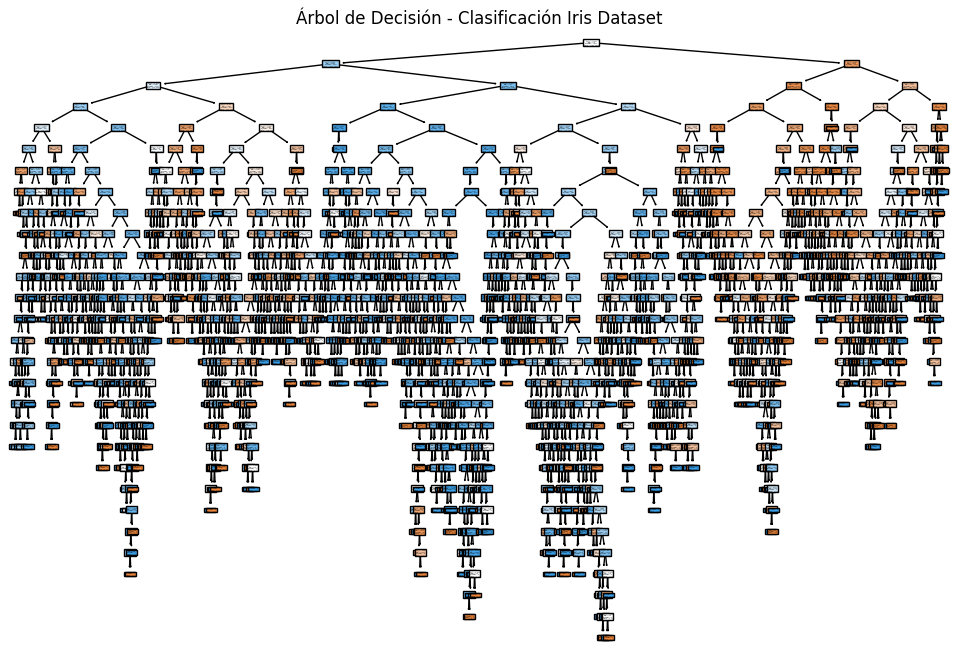

In [75]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X_train_clf, _, y_train_clf, _ = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train_clf, y_train_clf)
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True,)
plt.title("Árbol de Decisión - Clasificación Iris Dataset")
plt.show()

In [59]:
# ahora vamos con el LAB

In [60]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [63]:
# Cargar los datos
target_df = pd.read_csv(r"C:\Users\danie\Downloads\target.csv")


In [85]:
target_df

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [64]:
numerical_df = pd.read_csv(r"C:\Users\danie\Downloads\numerical.csv")

In [76]:
categorical_df = pd.read_csv(r"C:\Users\danie\Downloads\categorical.csv")

In [77]:
# Combinar datos numéricos y categóricos
data = pd.concat([numerical_df, categorical_df], axis=1)

In [78]:
data

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,0,60.000000,5,9,0,0,39,34,18,10,...,37,12,92,8,94,2,95,12,89,11
1,1,46.000000,6,9,16,0,15,55,11,6,...,52,2,93,10,95,12,95,12,93,10
2,1,61.611649,3,1,2,0,20,29,33,6,...,0,2,91,11,92,7,95,12,90,1
3,0,70.000000,1,4,2,0,23,14,31,3,...,28,1,87,11,94,11,95,12,87,2
4,0,78.000000,3,2,60,1,28,9,53,26,...,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,2,96,2,96,2,96,2,96,2
95408,1,48.000000,7,9,1,0,31,43,19,4,...,50,1,96,3,96,3,96,3,96,3
95409,1,60.000000,5,9,0,0,18,46,20,7,...,38,1,96,3,95,1,96,10,94,10
95410,0,58.000000,7,9,0,0,28,35,20,9,...,40,5,90,11,96,8,97,1,86,12


In [79]:
# Codificar variables categóricas
cat_cols = categorical_df.columns
num_cols = numerical_df.columns

In [80]:
# Aplicar codificación one-hot a las variables categóricas
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = encoder.fit_transform(categorical_df)

C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [83]:
# Obtener nombres de columnas para las variables categóricas codificadas
encoded_columns = encoder.get_feature_names_out(categorical_df.columns)

In [84]:
# Convertir a DataFrame y unir con datos numéricos
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoded_columns)
data_encoded = pd.concat([numerical_df, encoded_categorical_df], axis=1)

In [88]:

# Separar características (X) y la variable objetivo (y)
X = data_encoded
y = target_df['TARGET_B']

In [89]:
# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [90]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


In [92]:
# Inicializar y entrenar el modelo de Bosques Aleatorios
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [93]:
# Predecir sobre los datos de prueba
y_pred = rf_model.predict(X_test)

In [94]:

# Evaluar el modelo
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[18054     0]
 [  978 17196]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     18054
           1       1.00      0.95      0.97     18174

    accuracy                           0.97     36228
   macro avg       0.97      0.97      0.97     36228
weighted avg       0.97      0.97      0.97     36228


Accuracy Score: 0.9730043060616098


In [95]:
from sklearn.pipeline import Pipeline

In [96]:
from sklearn.model_selection import train_test_split, cross_val_score

In [97]:
# Aplicar Validación Cruzada
cv_scores = cross_val_score(rf_model, X_smote, y_smote, cv=5, scoring='accuracy')